In [1]:
#Importing Libraries 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

<function matplotlib.pyplot.show(close=None, block=None)>

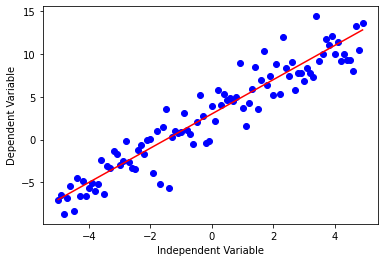

In [10]:
#Example of Linear Regression via y=mx+b model


x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify changes in the graph

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r') #Regression Line 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show

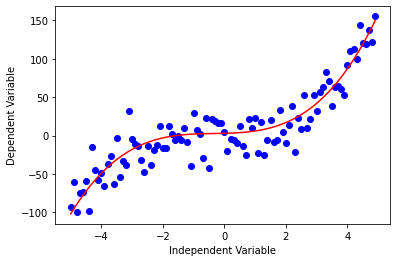

In [9]:
#Example of Cubic Function

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3

y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


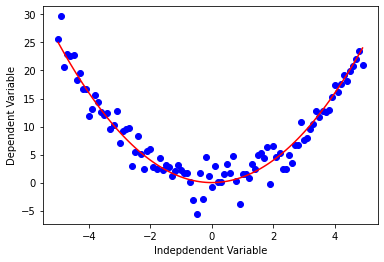

In [11]:
#Example of Quadratic Function

x = np.arange(-5.0, 5.0, 0.1)


y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()



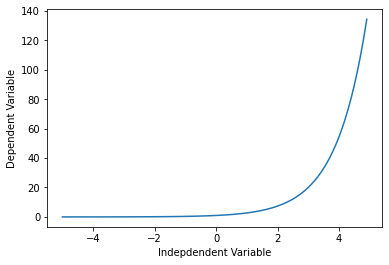

In [17]:
#Exponential 

X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\Users\SURFAC~1\AppData\Local\Temp/ipykernel_2144/566328914.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


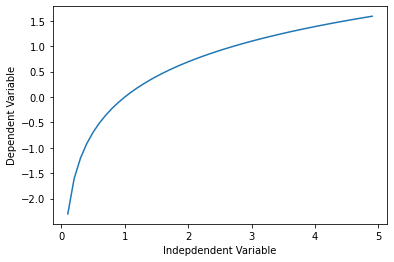

In [14]:
#Logarithmic
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
#plt.show()

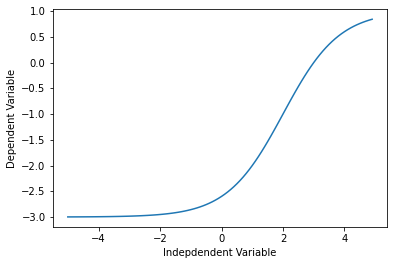

In [16]:
#Logistic

X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [18]:
#Using China's Annual GDP in US dollars to perform a non-linear regression

#Libraries added to analysis

import numpy as np
import pandas as pd

#Dataset import
df = pd.read_csv("https://raw.githubusercontent.com/isaac-michel224/Spreadsheets/main/china_gdp.csv")
df.head(10)


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


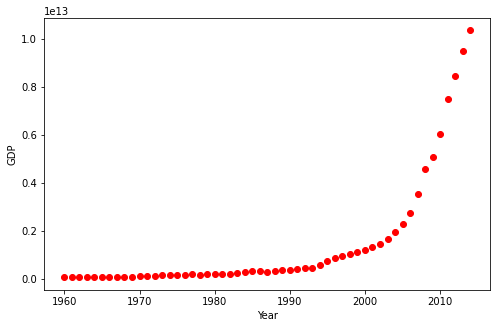

In [19]:
#Plotting the Dataset

plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

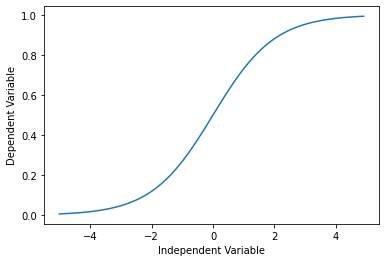

In [20]:
#Based on above, chossing a logisitc function would be the best approximation

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [21]:
#Building Model and Initialzing Parameters

def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y



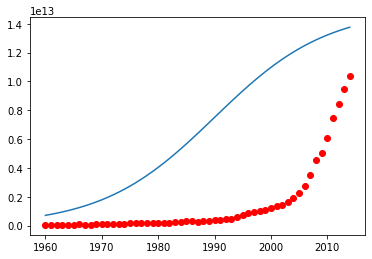

In [22]:
#Examining Sample Sigmoid line

beta_1 = 0.10
beta_2 = 1990.0

#Logisitc function
Y_pred = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')


In [23]:
#To find the best parameters, we must first normalize both x and y

xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [24]:
#Best parameters - curve_fit, uses non-linear least squares to fit our sigmoid function, to data

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.451712, beta_2 = 0.997207


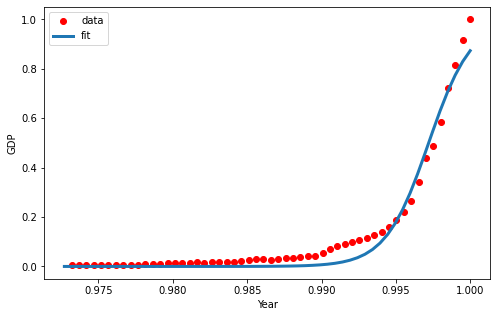

In [25]:
#Plotting the resulting regression line 

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize = (8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [26]:
#Model Accuracy

    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
